In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

In [9]:
csv_path = "occultation_significance.csv"  # adjust path if needed
try:
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} rows from {csv_path}")
    df.head()
except FileNotFoundError:
    raise FileNotFoundError(f"File not found: {csv_path}. Please check the path.")

Loaded 54 rows from occultation_significance.csv


In [10]:
df.head()

,event,freq_label,event_type,delta,sigma,z_score,u_stat,p_dir,p_two,p_flip,q_dir,q_flip,detected_dir,detected_flip
0,crab_nebula_ingress,0.45,-1.0,-58.676872,21.815421,-2.689697,2.689697,0.079208,0.138614,1.000000,0.440303,1.000000,0,0
1,crab_nebula_ingress,0.70,-1.0,253.999921,31.914802,7.958687,-7.958687,0.930693,0.128713,0.079208,1.000000,0.534653,0,0
2,crab_nebula_ingress,0.90,-1.0,689.005853,33.833197,20.364787,-20.364787,0.891089,0.158416,0.118812,1.000000,0.616908,0,0
3,crab_nebula_ingress,1.31,-1.0,728.791051,31.617395,23.050319,-23.050319,0.960396,0.069307,0.049505,1.000000,0.445545,0,0
4,crab_nebula_ingress,2.20,-1.0,319.427150,12.663520,25.224200,-25.224200,1.000000,0.009901,0.009901,1.000000,0.445545,0,0


In [11]:
crab_neb = df[df['event'].str.contains('crab',case =False,na = False)]
fornax = df[df['event'].str.contains('fornax',case =False,na = False)]
virgo_a = df[df['event'].str.contains('virgo',case =False,na = False)]

In [ ]:
def df_plotter_freq(df,label ='p_dir' ):
    # Map labels
    label_map = {-1: 'ingress', 1: 'egress'}
    color_map = {-1: 'C0', 1: 'C1'}  # or any colors you like

    plt.figure()

    # Plot each event type separately with fixed color & label
    for et in [-1, 1]:
        m = df['event_type'] == et
        plt.scatter(
            df.loc[m, 'freq_label'],
            df.loc[m, label],
            color=color_map[et],
            label=label_map[et]
        )

    plt.legend(title='Event Type')
    plt.xlabel('Frequency (freq_label)')
    plt.ylabel('p_dir')
    plt.hlines(0.05, 0, 10)
    plt.xlim(0, 10)
    plt.show()

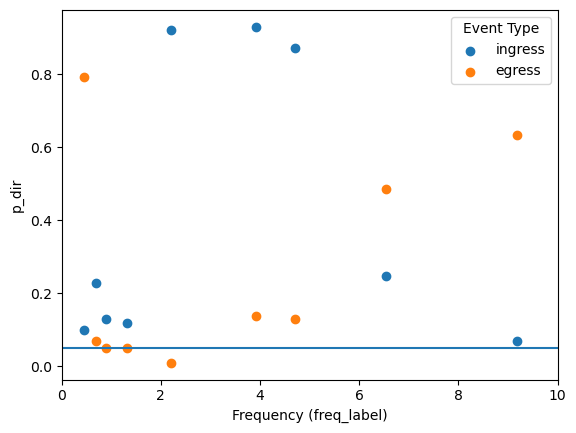

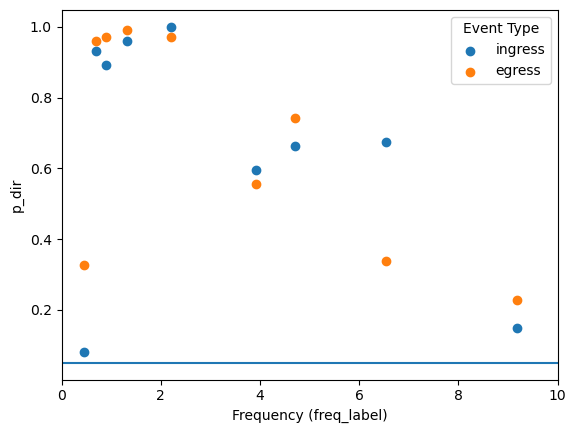

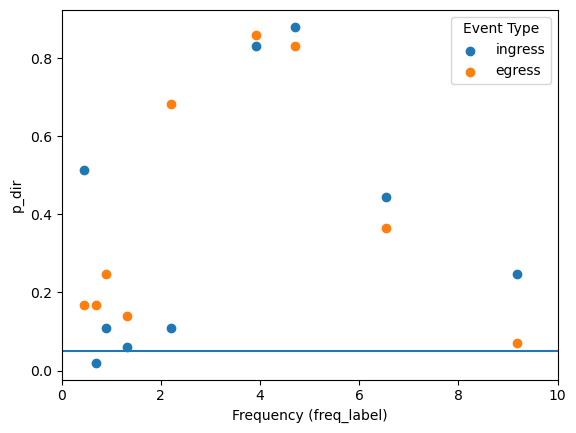

In [16]:
p_val_plotter(fornax)
p_val_plotter(crab_neb)
p_val_plotter(virgo_a)